<a href="https://colab.research.google.com/github/kouchan0708/q-macro/blob/main/Germany_Japan_cycle_component.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

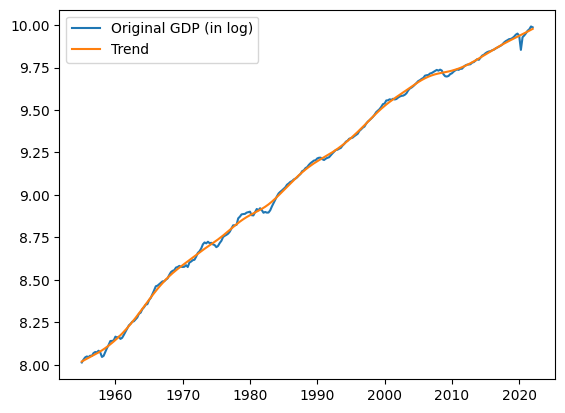

In [13]:
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np

# set the start and end dates for the data
start_date = '1955-01-01'
end_date = '2022-01-01'

# download the data from FRED using pandas_datareader
# Use the FRED code for Germany's real GDP, which is 'GDPC1'.
gdp = web.DataReader('GDPC1', 'fred', start_date, end_date)
log_gdp = np.log(gdp)

# calculate the quarterly percent change in real GDP
gdp_pct_change = gdp.pct_change(4)

# apply a Hodrick-Prescott filter to the data to extract the cyclical component
cycle, trend = sm.tsa.filters.hpfilter(log_gdp, lamb=1600)

# Plot the original time series data
plt.plot(log_gdp, label="Original GDP (in log)")

# Plot the trend component
plt.plot(trend, label="Trend")

# Add a legend and show the plot
plt.legend()
plt.show()


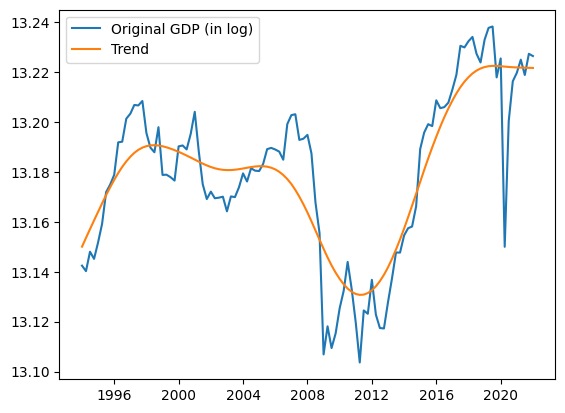

In [16]:
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np

# データの開始日と終了日を設定します
start_date = '1955-01-01'
end_date = '2022-01-01'

# pandas_datareaderを使用してFREDからデータをダウンロードします
# 日本の実質GDPのFREDコードは 'JPNNGDP' です
gdp = web.DataReader('JPNNGDP', 'fred', start_date, end_date)
log_gdp = np.log(gdp)

# 実質GDPの四半期ごとのパーセント変化を計算します
gdp_pct_change = gdp.pct_change(4)

# Hodrick-Prescottフィルターを適用してデータからトレンド成分を抽出します
cycle, trend = sm.tsa.filters.hpfilter(log_gdp, lamb=1600)

# オリジナルの対数形式の実質GDPデータとトレンド成分をプロットします
plt.plot(log_gdp, label="Original GDP (in log)")
plt.plot(trend, label="Trend")

# 凡例を追加してプロットを表示します
plt.legend()
plt.show()


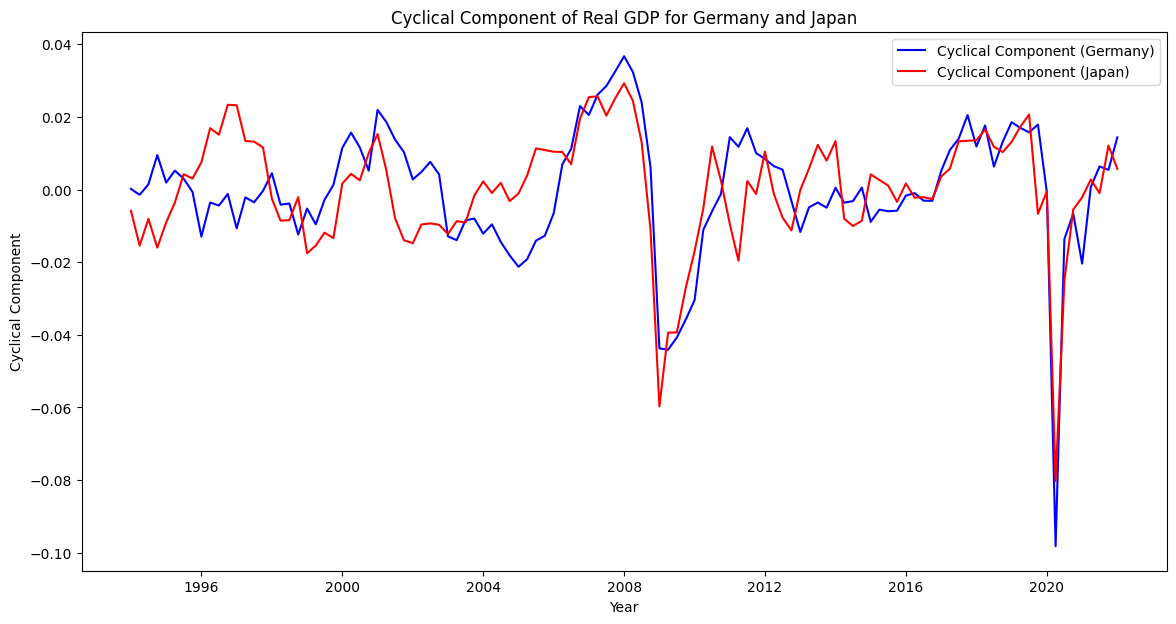

In [12]:
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np

# Set the start and end dates for the data
start_date = '1955-01-01'
end_date = '2022-01-01'

# Download the data from FRED using pandas_datareader for Germany and Japan
gdp_germany = web.DataReader('CLVMNACSCAB1GQDE', 'fred', start_date, end_date)  # Germany Real GDP
gdp_japan = web.DataReader('JPNRGDPEXP', 'fred', start_date, end_date)  # Japan Real GDP

# Log-transform the GDP data
log_gdp_germany = np.log(gdp_germany)
log_gdp_japan = np.log(gdp_japan)

# Align start dates
start_date_aligned = max(log_gdp_germany.index[0], log_gdp_japan.index[0])

# Truncate data to start from the aligned start date
log_gdp_germany = log_gdp_germany[log_gdp_germany.index >= start_date_aligned]
log_gdp_japan = log_gdp_japan[log_gdp_japan.index >= start_date_aligned]

# Apply a Hodrick-Prescott filter to the log-transformed data to extract the cyclical component
cycle_germany, trend_germany = sm.tsa.filters.hpfilter(log_gdp_germany, lamb=1600)
cycle_japan, trend_japan = sm.tsa.filters.hpfilter(log_gdp_japan, lamb=1600)

# Plot the cyclical component for Germany and Japan
plt.figure(figsize=(14, 7))
plt.plot(cycle_germany, label="Cyclical Component (Germany)", color='blue')
plt.plot(cycle_japan, label="Cyclical Component (Japan)", color='red')

# Add a legend and show the plot
plt.legend()
plt.title('Cyclical Component of Real GDP for Germany and Japan')
plt.xlabel('Year')
plt.ylabel('Cyclical Component')
plt.show()
